In [1]:
!pip install statsmodels --upgrade


  Obtaining dependency information for statsmodels from https://files.pythonhosted.org/packages/d5/7e/61ec96b208af273126a211a9aa1c9dfefb216725192973fc52a858ac9219/statsmodels-0.14.2-cp311-cp311-win_amd64.whl.metadata
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB ? eta -:--:--
   ---------------------------------------- 0.0/9.9 MB 325.1 kB/s eta 0:00:31
   ---------------------------------------- 0.0/9.9 MB 245.8 kB/s eta 0:00:40
   ---------------------------------------- 0.1/9.9 MB 297.7 kB/s eta 0:00:33
   ---------------------------------------- 0.1/9.9 MB 297.7 kB/s eta 0:00:33
   ---------------------------------------- 0.1/9.9 MB 297.7 kB/s eta 0:00:33
    --------------------------------------- 0.2/9.9 MB 499.5 kB/s eta 0:00:20
    --------------------------------------- 0.2/9.9 MB 499.5 kB/s eta 0:00:20
    --------------------------------------- 0.2/9.9 MB 499.5 kB/s eta 0:00:20
    -----------------

# Importing libraries & Data

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot
from statsmodels.tsa.ar_model import AutoReg 

In [2]:
mainfile= pd.read_csv('temp.csv', index_col= 0, parse_dates= True, dayfirst= True)

tempvals= mainfile.values

print('Shape of the data: \t', mainfile.shape, '\n', '\n'
'Data Description: \n', mainfile.describe(), '\n', '\n', 'Original Data: \n', mainfile.head(), '\n', '\n', 'Extracted data: \n', tempvals)


Shape of the data: 	 (3650, 1) 
 
Data Description: 
               Temp
count  3650.000000
mean     11.177753
std       4.071837
min       0.000000
25%       8.300000
50%      11.000000
75%      14.000000
max      26.300000 
 
 Original Data: 
             Temp
Date            
1981-01-01  20.7
1981-01-02  17.9
1981-01-03  18.8
1981-01-04  14.6
1981-01-05  15.8 
 
 Extracted data: 
 [[20.7]
 [17.9]
 [18.8]
 ...
 [13.5]
 [15.7]
 [13. ]]


<Axes: xlabel='Date'>

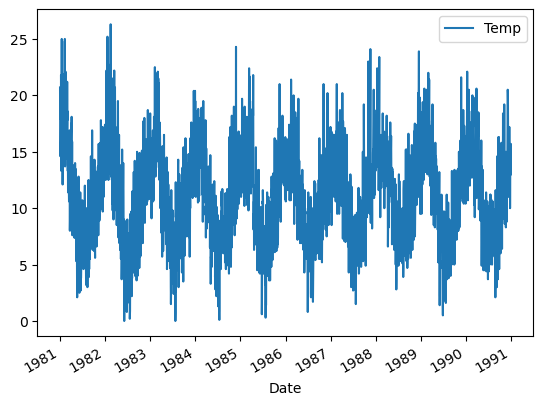

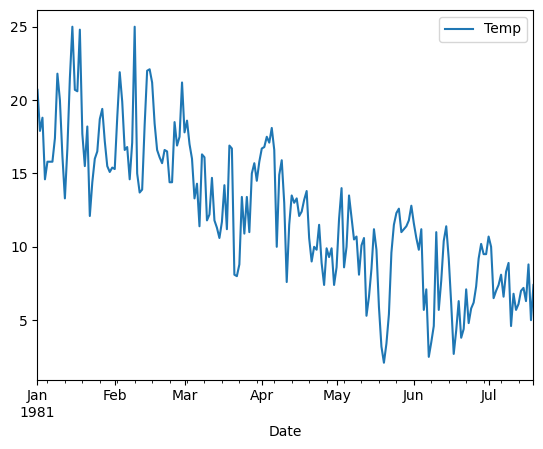

In [3]:
mainfile.plot() #compressed view. 
mainfile[:200].plot()

# Check for Stationarity 

In [4]:
from statsmodels.tsa.stattools import adfuller 
filetest= adfuller(mainfile['Temp'], autolag= 'AIC')

print('1. ADF: \t', filetest[0], '\n', '2. P-Value: \t', filetest[1], '\n', '3. No. of Lags: \t', filetest[2], '\n', '4. No. of Observations: \t', filetest[3], '\n', '5. Critical Values: \t', filetest[4], '\n',)

for key, val in filetest[4].items(): 
    print ('\t', key, ':', val)

1. ADF: 	 -4.4448049246117005 
 2. P-Value: 	 0.0002470826300360988 
 3. No. of Lags: 	 20 
 4. No. of Observations: 	 3629 
 5. Critical Values: 	 {'1%': -3.4321532327220154, '5%': -2.862336767636517, '10%': -2.56719413172842} 

	 1% : -3.4321532327220154
	 5% : -2.862336767636517
	 10% : -2.56719413172842


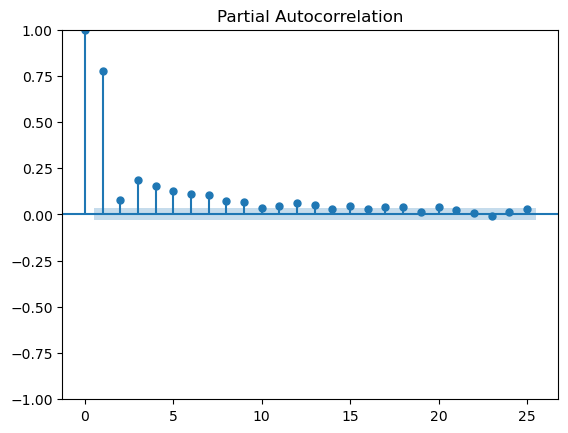

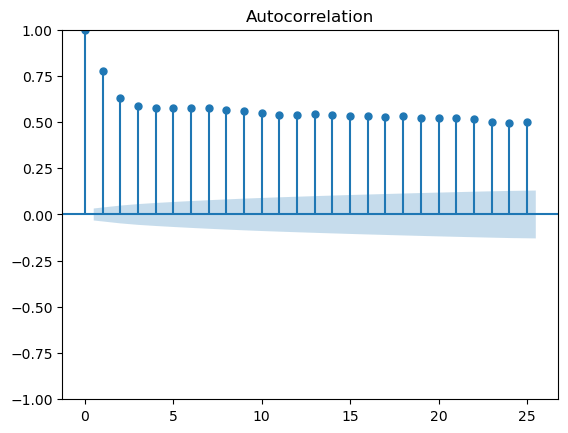

In [5]:
from statsmodels.graphics.tsaplots import plot_pacf, plot_acf
pacf= plot_pacf(mainfile['Temp'], lags= 25)
acf= plot_acf(mainfile['Temp'], lags= 25)

In [6]:
train= tempvals[:len(tempvals)-7]
test= tempvals[len(tempvals)-7:]

In [7]:
model= AutoReg(train, lags=10).fit()
print(model.summary())

                            AutoReg Model Results                             
Dep. Variable:                      y   No. Observations:                 3643
Model:                    AutoReg(10)   Log Likelihood               -8375.514
Method:               Conditional MLE   S.D. of innovations              2.427
Date:                Tue, 21 May 2024   AIC                          16775.028
Time:                        11:39:54   BIC                          16849.402
Sample:                            10   HQIC                         16801.521
                                 3643                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.9350      0.142      6.603      0.000       0.657       1.213
y.L1           0.6103      0.017     36.795      0.000       0.578       0.643
y.L2          -0.0832      0.019     -4.289      0.0

In [11]:
print(len(train))

3643


In [10]:
pred= model.predict(start= len(train), end= len(tempvals)-1, dynamic= False)

# Comparing Model predictions

[11.47679312 12.63726604 13.0574664  13.03378918 12.8259307  12.65767226
 12.43273596]


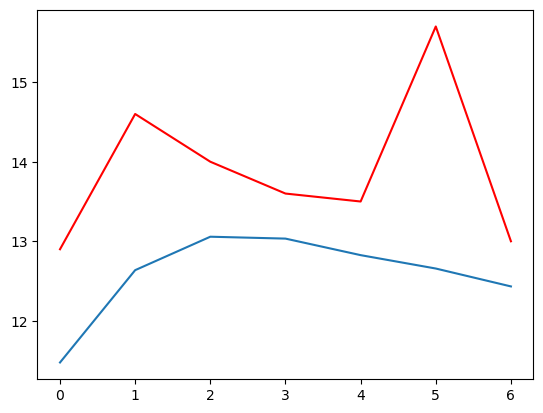

In [12]:
pyplot.plot(pred)
pyplot.plot(test, color= 'red')
print(pred)

# Calculation of Error

In [13]:
from math import sqrt
from sklearn.metrics import mean_squared_error
error= sqrt(mean_squared_error(test, pred))
print(error)

1.5638196220860625


# Making Future Predictions

In [14]:
futurevals= model.predict(start= len(tempvals)+1, end= len(tempvals)+7, dynamic= False)

print('The prediction of temperatures for the next week are: \n', '\n', futurevals[0], '\n', futurevals[1], '\n', futurevals[2], '\n', futurevals[3], '\n', futurevals[4], '\n')
print('Error:', error)

The prediction of temperatures for the next week are: 
 
 12.28608803599533 
 12.203095363296349 
 12.249159162091168 
 12.306188748518094 
 12.311996891601769 

Error: 1.5638196220860625
